# Detection of Fraud Reviews: Modeling and Evaluation

# Loading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, precision_recall_curve

# Reading datasets

## fake_reviews_final_df dataset

In [2]:
# Path to your CSV file
fake_reviews_final_df_path = '/Users/ShanShan/Fake-Reviews-Detection/ShanShan_notebooks/fake_reviews_final_df.csv'

# Read the CSV file
fake_reviews_final_df = pd.read_csv(fake_reviews_final_df_path)

Information

In [3]:
fake_reviews_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40419 entries, 0 to 40418
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   final_cleaned_review                   40419 non-null  object 
 1   text_                                  40419 non-null  object 
 2   word_count                             40419 non-null  int64  
 3   avg_word_length                        40419 non-null  float64
 4   avg_sentence_length                    40419 non-null  float64
 5   uppercase_char_count                   40419 non-null  int64  
 6   rating                                 40419 non-null  float64
 7   label                                  40419 non-null  int64  
 8   Sentiment_Neutral                      40419 non-null  float64
 9   Sentiment_Positive                     40419 non-null  float64
 10  category_Clothing_Shoes_and_Jewelry_5  40419 non-null  float64
 11  ca

Shape

In [4]:
fake_reviews_final_df.shape

(40419, 20)

Columns

In [5]:
fake_reviews_final_df.columns

Index(['final_cleaned_review', 'text_', 'word_count', 'avg_word_length',
       'avg_sentence_length', 'uppercase_char_count', 'rating', 'label',
       'Sentiment_Neutral', 'Sentiment_Positive',
       'category_Clothing_Shoes_and_Jewelry_5', 'category_Electronics_5',
       'category_Food_5', 'category_Home_and_Kitchen_5',
       'category_Kindle_Store_5', 'category_Movies_and_TV_5',
       'category_Pet_Supplies_5', 'category_Sports_and_Outdoors_5',
       'category_Tools_and_Home_Improvement_5', 'category_Toys_and_Games_5'],
      dtype='object')

Structure

In [6]:
# Display the first few rows
fake_reviews_final_df.head()

,final_cleaned_review,text_,word_count,avg_word_length,avg_sentence_length,uppercase_char_count,rating,label,Sentiment_Neutral,Sentiment_Positive,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Food_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5
0,love well made sturdy comfortable love pretty,"Love this! Well made, sturdy, and very comfor...",13,4.384615,6.500000,4,5.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,love great upgrade original mine couple year,"love it, a great upgrade from the original. I...",17,3.705882,8.500000,1,5.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pillow saved back love look feel pillow,This pillow saved my back. I love the look and...,14,3.714286,4.666667,2,5.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,missing information use great product price,"Missing information on how to use it, but it i...",17,3.647059,17.000000,2,1.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,nice set good quality set two month,Very nice set. Good quality. We have had the s...,18,3.666667,6.000000,3,5.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## yelp_final_df dataset

In [7]:
# Path to your CSV file
yelp_final_df_path = '/Users/ShanShan/Fake-Reviews-Detection/ShanShan_notebooks/yelp_final_df.csv'

# Read the CSV file
yelp_final_df = pd.read_csv(yelp_final_df_path)

Information

In [8]:
yelp_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355198 entries, 0 to 355197
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   final_cleaned_review                   355198 non-null  object 
 1   Review                                 355198 non-null  object 
 2   word_count                             355198 non-null  int64  
 3   avg_word_length                        355198 non-null  float64
 4   avg_sentence_length                    355198 non-null  float64
 5   uppercase_char_count                   355198 non-null  int64  
 6   rating                                 355198 non-null  float64
 7   label                                  355198 non-null  int64  
 8   Sentiment_Neutral                      355198 non-null  float64
 9   Sentiment_Positive                     355198 non-null  float64
 10  category_Clothing_Shoes_and_Jewelry_5  355198 non-null  

Shape

In [9]:
yelp_final_df.shape

(355198, 20)

Columns

In [10]:
yelp_final_df.columns

Index(['final_cleaned_review', 'Review', 'word_count', 'avg_word_length',
       'avg_sentence_length', 'uppercase_char_count', 'rating', 'label',
       'Sentiment_Neutral', 'Sentiment_Positive',
       'category_Clothing_Shoes_and_Jewelry_5', 'category_Electronics_5',
       'category_Food_5', 'category_Home_and_Kitchen_5',
       'category_Kindle_Store_5', 'category_Movies_and_TV_5',
       'category_Pet_Supplies_5', 'category_Sports_and_Outdoors_5',
       'category_Tools_and_Home_Improvement_5', 'category_Toys_and_Games_5'],
      dtype='object')

Structure

In [11]:
# Display the first few rows
yelp_final_df.head()

,final_cleaned_review,Review,word_count,avg_word_length,avg_sentence_length,uppercase_char_count,rating,label,Sentiment_Neutral,Sentiment_Positive,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Food_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5
0,food snack selection popular greek dish appeti...,The food at snack is a selection of popular Gr...,40,4.225000,8.000000,6,3.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,little place soho wonderful lamb sandwich glas...,This little place in Soho is wonderful. I had ...,54,3.870370,10.800000,6,3.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ordered lunch snack last friday time nothing m...,ordered lunch for 15 from Snack last Friday. Ã...,31,4.451613,7.750000,4,4.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,beautiful quaint little restaurant pretty stre...,This is a beautiful quaint little restaurant o...,90,4.311111,11.250000,8,4.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,snack great place casual sit lunch especially ...,Snack is great place for a Ã‚Â casual sit down...,105,4.504762,8.076923,10,4.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Check for missing values

## fake_reviews_final_df dataset

In [12]:
# Check for missing values
fake_reviews_final_df.isnull().sum()

final_cleaned_review                     0
text_                                    0
word_count                               0
avg_word_length                          0
avg_sentence_length                      0
uppercase_char_count                     0
rating                                   0
label                                    0
Sentiment_Neutral                        0
Sentiment_Positive                       0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Food_5                          0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
dtype: int64

## yelp_final_df dataset

In [13]:
# Check for missing values
yelp_final_df.isnull().sum()

final_cleaned_review                     0
Review                                   0
word_count                               0
avg_word_length                          0
avg_sentence_length                      0
uppercase_char_count                     0
rating                                   0
label                                    0
Sentiment_Neutral                        0
Sentiment_Positive                       0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Food_5                          0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
dtype: int64

# Splitting datasets into train and test set

In [14]:
# Split the yelp dataset into training and test sets
X_yelp = yelp_final_df.drop(columns=['label', 'Review'])

y_yelp = yelp_final_df['label']

X_yelp_train, X_yelp_test, y_yelp_train, y_yelp_test = train_test_split(X_yelp, y_yelp, test_size=0.2, random_state=42)

In [15]:
# Split the fake reviews dataset into training and test sets
X_fake_reviews = fake_reviews_final_df.drop(columns=['label', 'text_'])

y_fake_reviews = fake_reviews_final_df['label']

X_fake_reviews_train, X_fake_reviews_test, y_fake_reviews_train, y_fake_reviews_test = train_test_split(X_fake_reviews, y_fake_reviews, test_size=0.2, random_state=42)

# TF-IDF

In [16]:
# Define the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [17]:
# Fit and transform the training data for yelp
X_yelp_train_tfidf = pd.DataFrame(tfidf_vectorizer.fit_transform(X_yelp_train['final_cleaned_review']).toarray(),
                                  columns=tfidf_vectorizer.get_feature_names_out())

# Transform the test data for yelp
X_yelp_test_tfidf = pd.DataFrame(tfidf_vectorizer.transform(X_yelp_test['final_cleaned_review']).toarray(),
                                 columns=tfidf_vectorizer.get_feature_names_out())

In [18]:
# Fit and transform the training data for fake reviews
X_fake_reviews_train_tfidf = pd.DataFrame(tfidf_vectorizer.fit_transform(X_fake_reviews_train['final_cleaned_review']).toarray(),
                                          columns=tfidf_vectorizer.get_feature_names_out())

# Transform the test data for fake reviews
X_fake_reviews_test_tfidf = pd.DataFrame(tfidf_vectorizer.transform(X_fake_reviews_test['final_cleaned_review']).toarray(),
                                         columns=tfidf_vectorizer.get_feature_names_out())


In [19]:
# Combine the TF-IDF columns with the rest of the DataFrame for yelp training and test sets
X_yelp_train_encoded_tfidf = pd.concat([X_yelp_train.drop(columns=['final_cleaned_review']).reset_index(drop=True),
                                        X_yelp_train_tfidf.reset_index(drop=True)], axis=1)

X_yelp_test_encoded_tfidf = pd.concat([X_yelp_test.drop(columns=['final_cleaned_review']).reset_index(drop=True),
                                       X_yelp_test_tfidf.reset_index(drop=True)], axis=1)

In [20]:
# Combine the TF-IDF columns with the rest of the DataFrame for fake reviews training and test sets
X_fake_reviews_train_encoded_tfidf = pd.concat([X_fake_reviews_train.drop(columns=['final_cleaned_review']).reset_index(drop=True),
                                                X_fake_reviews_train_tfidf.reset_index(drop=True)], axis=1)

X_fake_reviews_test_encoded_tfidf = pd.concat([X_fake_reviews_test.drop(columns=['final_cleaned_review']).reset_index(drop=True),
                                               X_fake_reviews_test_tfidf.reset_index(drop=True)], axis=1)


# SMOTE

In [21]:
# Apply SMOTE on Yelp training data
smote_yelp = SMOTE(random_state=42)

# Resample training data for Yelp
X_yelp_train_resampled, y_yelp_train_resampled = smote_yelp.fit_resample(
    X_yelp_train_encoded_tfidf, y_yelp_train
)

In [22]:
# Verify the resampling balance
print("Before SMOTE:", y_yelp_train.value_counts())
print("After SMOTE:", y_yelp_train_resampled.value_counts())

Before SMOTE: label
0    255298
1     28860
Name: count, dtype: int64
After SMOTE: label
0    255298
1    255298
Name: count, dtype: int64


In [23]:
# The test set remains unchanged
# Check dimensions for confirmation
print("X_yelp_train_resampled shape:", X_yelp_train_resampled.shape)
print("y_yelp_train_resampled shape:", y_yelp_train_resampled.shape)

print("X_yelp_test shape:", X_yelp_test_encoded_tfidf.shape)
print("y_yelp_test shape:", y_yelp_test.shape)

X_yelp_train_resampled shape: (510596, 1017)
y_yelp_train_resampled shape: (510596,)
X_yelp_test shape: (71040, 1017)
y_yelp_test shape: (71040,)


In [24]:
# The test set remains unchanged
# Check dimensions for confirmation
print("X_fake_reviews_train shape:", X_fake_reviews_train_encoded_tfidf.shape)
print("y_fake_reviews_train shape:", y_fake_reviews_train.shape)

print("X_fake_reviews_test shape:", X_fake_reviews_test_encoded_tfidf.shape)
print("y_fake_reviews_test shape:", y_fake_reviews_test.shape)

X_fake_reviews_train shape: (32335, 1017)
y_fake_reviews_train shape: (32335,)
X_fake_reviews_test shape: (8084, 1017)
y_fake_reviews_test shape: (8084,)


# Merging Fake Review Dataset and Yelp Dataset

In [25]:
# Find common columns between training datasets and testing datasets
common_columns_train = X_yelp_train_encoded_tfidf.columns.intersection(X_fake_reviews_train_encoded_tfidf.columns)

common_columns_test = X_yelp_test_encoded_tfidf.columns.intersection(X_fake_reviews_test_encoded_tfidf.columns)

In [26]:
# Ensure only common columns are merged
X_yelp_train_encoded_tfidf_common = X_yelp_train_encoded_tfidf[common_columns_train]
X_fake_reviews_train_common = X_fake_reviews_train_encoded_tfidf[common_columns_train]

X_yelp_test_encoded_tfidf_common = X_yelp_test_encoded_tfidf[common_columns_test]
X_fake_reviews_test_encoded_tfidf_common = X_fake_reviews_test_encoded_tfidf[common_columns_test]

In [27]:
# Merge the training datasets
X_train_merged = pd.concat([X_yelp_train_encoded_tfidf_common, X_fake_reviews_train_common], axis=0)
y_train_merged = pd.concat([y_yelp_train, y_fake_reviews_train], axis=0)

In [28]:
# Merge the testing datasets
X_test_merged = pd.concat([X_yelp_test_encoded_tfidf_common, X_fake_reviews_test_encoded_tfidf_common], axis=0)
y_test_merged = pd.concat([y_yelp_test, y_fake_reviews_test], axis=0)

# Modeling

In [29]:
# Hyperparameter tuning
n_iter=100
cv=10
scoring='roc_auc'
random_state=42

In [30]:
# General function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print and plot confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    # Calculate and print AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    
    # Calculate PRC AUC
    prc_auc = auc(recall, precision)
    print(f"PRC AUC: {prc_auc:.4f}")
    
    # Plot Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label=f'PRC AUC = {prc_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

In [31]:
# General function for hyperparameter tuning using RandomizedSearchCV
def hyperparameter_tuning(model, param_distributions, X_train, y_train, n_iter, cv, scoring, random_state):
    # Initialize RandomizedSearchCV
    randomized_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=cv, scoring=scoring, random_state=random_state)
    
    # Fit RandomizedSearchCV
    randomized_search.fit(X_train, y_train)
    
    # Print the best parameters found
    print(f"Best parameters: {randomized_search.best_params_}")
    
    # Return the best estimator
    return randomized_search.best_estimator_

# Logistic Regression

## Initial model

In [32]:
# Define the initial model configuration
lg_model_config = {
    'max_iter': 5000,  # Increase to allow more iterations
    'random_state': 42,
    'penalty': 'l2',  # Regularization
}

lg_model = LogisticRegression(**lg_model_config)

lg_param_distributions = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.1, 1, 10, 100], 
    'penalty': ['l2', 'elasticnet'], 
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [100, 500, 1000, 5000]  # Include higher values for "infinity"
}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     67805
           1       0.75      0.28      0.41     11319

    accuracy                           0.88     79124
   macro avg       0.82      0.63      0.67     79124
weighted avg       0.87      0.88      0.86     79124

Confusion Matrix:


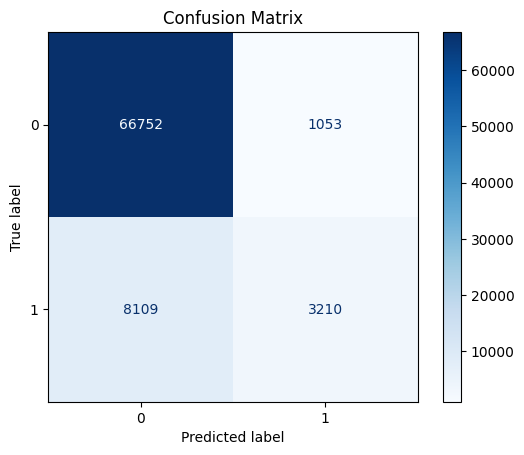

AUC-ROC: 0.7464


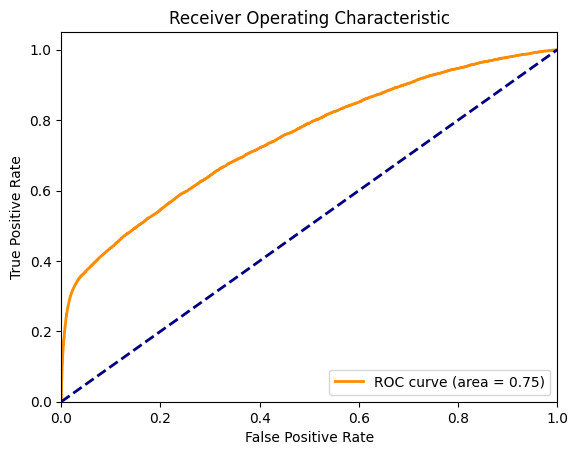

PRC AUC: 0.4761


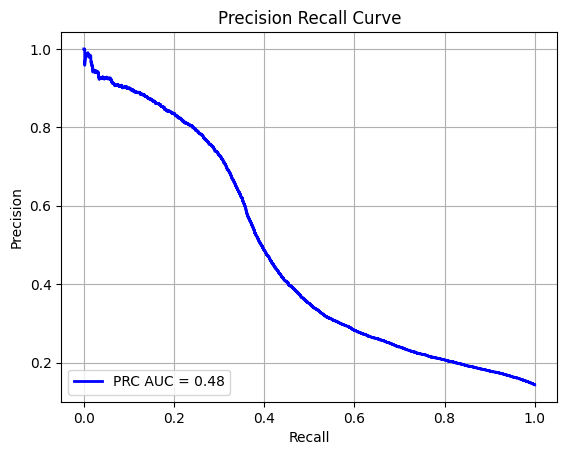

In [33]:
# Train and evaluate the model
train_and_evaluate_model(lg_model, X_train_merged, y_train_merged, X_test_merged, y_test_merged)

# Adaboost Model

## Initial model

In [34]:
# Define the initial model configuration
ada_model_config = {
    'n_estimators': 400,
    'algorithm': 'SAMME',
    'learning_rate': 0.1,
    'random_state': 42
}

ada_model = AdaBoostClassifier(**ada_model_config)

ada_param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3, 4, 5]
}

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     67805
           1       0.75      0.15      0.25     11319

    accuracy                           0.87     79124
   macro avg       0.81      0.57      0.59     79124
weighted avg       0.86      0.87      0.83     79124

Confusion Matrix:


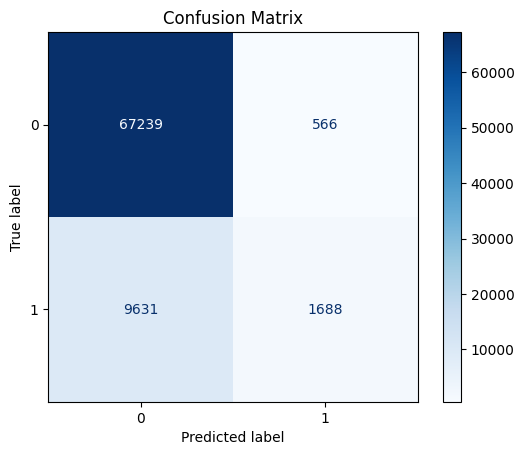

AUC-ROC: 0.7371


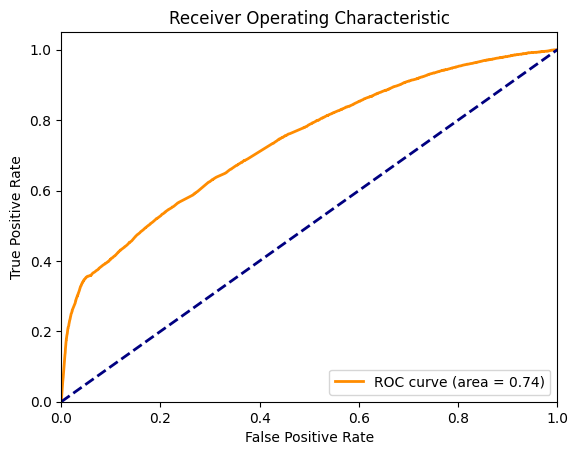

PRC AUC: 0.4173


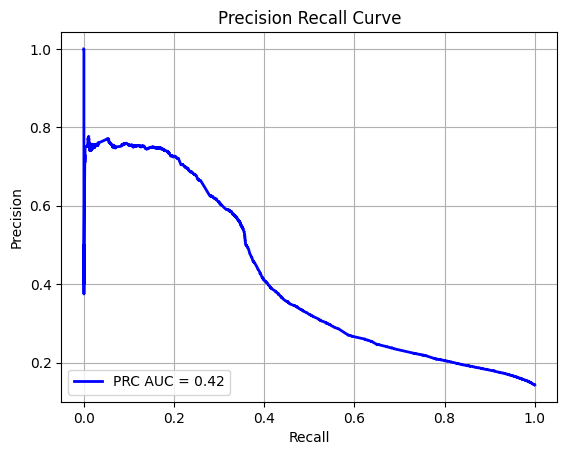

In [35]:
# Train and evaluate the model
train_and_evaluate_model(ada_model, X_train_merged, y_train_merged, X_test_merged, y_test_merged)

# Gradient Boosting

## Initial model

In [36]:
# Define the initial model configuration
gbc_model_config = {
    'n_estimators': 400,
    'criterion': 'friedman_mse',
    'max_depth': None,
    'learning_rate': 0.1,
    'min_samples_split': 2,
    'random_state': 42
}

gbc_model = GradientBoostingClassifier(**gbc_model_config)

gbc_param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0]
}

In [37]:
# Train and evaluate the model
train_and_evaluate_model(gbc_model, X_train_merged, y_train_merged, X_test_merged, y_test_merged)

KeyboardInterrupt: 

# XGBoost

## Initial model

In [ ]:
# Define the initial model configuration
xgb_model_config = {
    'n_estimators': 400,
    'eval_metric': 'logloss',
    'max_depth': None,
    'learning_rate': 0.01,
    'random_state': 42,
}

xgb_model = XGBClassifier(**xgb_model_config)

xgb_param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(xgb_model, X_train_merged, y_train_merged, X_test_merged, y_test_merged)

# Random Forest

## Initial model

In [ ]:
# Define the initial model configuration
rf_model_config = {
    'n_estimators': 400,
    'criterion': 'log_loss',
    'max_depth': None,  # No limit on depth
    'min_samples_split': 2,
    'random_state': 42
}

rf_model = RandomForestClassifier(**rf_model_config)

rf_param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(rf_model, X_train_merged, y_train_merged, X_test_merged, y_test_merged)

# PassiveAggressiveClassifier

In [ ]:
# Define the initial model configuration
pa_model_config = {
    'max_iter': 1000,  # Maximum number of iterations
    'random_state': 42,  # Random seed for reproducibility
    'tol': 1e-3  # Tolerance for stopping criteria
}

# Initialize the PassiveAggressiveClassifier
pa_model = PassiveAggressiveClassifier(**pa_model_config)

# Hyperparameter tuning distribution
pa_param_distributions = {
    'C': [0.01, 0.1, 1.0, 10, 100],  # Regularization strength
    'max_iter': [50, 100, 200, 500, 1000],  # Maximum iterations
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping
    'early_stopping': [True, False],  # Whether to stop early if validation score is not improving
    'warm_start': [True, False],  # Whether to reuse the solution of the previous call to fit
    'n_iter_no_change': [5, 10, 20],  # Number of iterations with no improvement before stopping early
    'average': [True, False]  # Whether to average the weight vectors across iterations
}

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(pa_model, X_train_merged, y_train_merged, X_test_merged, y_test_merged)

# Hyperparameter tuning

In [ ]:
# Perform hyperparameter tuning
rf_best_model = hyperparameter_tuning(rf_model, rf_param_distributions, X_train_merged, y_train_merged, n_iter, cv, scoring, random_state)

# Tuned model

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(rf_best_model, X_train_merged, y_train_merged, X_test_merged, y_test_merged)

In [ ]:
# TF-IDF: Naive Bayes, Logistic Regression, Gradient Boosting, Adaboost, XGBoost, Random Forest

# word2vec: Logistic Regression, Gradient Boosting, Adaboost, XGBoost, Random Forest

# Tokenization: Bert, Roberta, LSTM

# Fine-tune: RandomizedSearch


# tf-idf, word2vec